In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
os.getcwd()

'/Users/yichen/Desktop/Aitagem'

In [2]:
df = pd.read_csv(r'/Users/yichen/Desktop/Aitagem/Admission_Predict.csv')
df = df.rename(columns={'Serial No.': 'Serial_No'})
df = df.rename(columns={'GRE Score': 'GRE_Score'})
df = df.rename(columns={'TOEFL Score': 'TOEFL_Score'})
df = df.rename(columns={'University Rating': 'University_Rating'})
df = df.rename(columns={'Chance of Admit ': 'Chance_Of_Admit'})
df = df.rename(columns={'LOR ': 'LOR'})
df = df.drop(['Serial_No'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE_Score          400 non-null    int64  
 1   TOEFL_Score        400 non-null    int64  
 2   University_Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance_Of_Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [3]:
df.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_Of_Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [4]:
print("OBSERVATIONS:")
print("CGPA, GRE Score, TOEFL SCORE are the 3 most important features")

# Print the correlations
cor=df.corr()['Chance_Of_Admit'].sort_values(ascending=False)
print("##############################")
print(cor)

OBSERVATIONS:
CGPA, GRE Score, TOEFL SCORE are the 3 most important features
##############################
Chance_Of_Admit      1.000000
CGPA                 0.873289
GRE_Score            0.802610
TOEFL_Score          0.791594
University_Rating    0.711250
SOP                  0.675732
LOR                  0.669889
Research             0.553202
Name: Chance_Of_Admit, dtype: float64


In [5]:
print("OBSERVATIONS:")
print("For having a 90% Chance to get admission one should have GRE=333.61,TOEFL=116.28,CGPA=9.53.If you get scores more than this then your chances of admission are very good.")

print("################################")
print(df[(df['Chance_Of_Admit']>0.90)].mean().reset_index())

OBSERVATIONS:
For having a 90% Chance to get admission one should have GRE=333.61,TOEFL=116.28,CGPA=9.53.If you get scores more than this then your chances of admission are very good.
################################
               index           0
0          GRE_Score  333.612245
1        TOEFL_Score  116.285714
2  University_Rating    4.653061
3                SOP    4.561224
4                LOR    4.479592
5               CGPA    9.536939
6           Research    1.000000
7    Chance_Of_Admit    0.937551


In [6]:
# SPLIT DATA FOR MODEL SELECTION
from sklearn.model_selection import train_test_split

X = df.drop(['Chance_Of_Admit'], axis=1)
y = df['Chance_Of_Admit']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=False)

In [7]:
pip install xgboost

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [11]:
# MODEL SELECTION
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
from sklearn.metrics import mean_squared_error

models = [['DecisionTree :',DecisionTreeRegressor()],
           ['Linear Regression :', LinearRegression()],
           ['RandomForest :',RandomForestRegressor()],
           ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)],
           ['SVM :', SVR()],
           ['AdaBoostClassifier :', AdaBoostRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()],
           ['Xgboost: ', XGBRegressor()],

           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['BayesianRidge: ', BayesianRidge()],
           ['ElasticNet: ', ElasticNet()],
           ['HuberRegressor: ', HuberRegressor()]]

print("MODEL SELECTION")

for name,model in models:
    model = model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

MODEL SELECTION
DecisionTree : 0.09414085191881366
Linear Regression : 0.0647331169578209
RandomForest : 0.07061666145464539
KNeighbours : 0.083342291185208
SVM : 0.0818072704465048
AdaBoostClassifier : 0.07931819523805983
GradientBoostingClassifier:  0.06641729284490792
Xgboost:  0.0751365063590514
Lasso:  0.1313765707596043
Ridge:  0.06479970981992443
BayesianRidge:  0.06489639576721215
ElasticNet:  0.09805987388222617
HuberRegressor:  0.06896508935747687


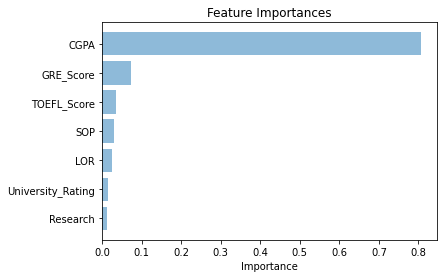

In [12]:
# Generate Feature Importance 
classifier = RandomForestRegressor()
classifier.fit(X,y)
feature_names = X.columns
importance_frame = pd.DataFrame()
importance_frame['Features'] = X.columns
importance_frame['Importance'] = classifier.feature_importances_
importance_frame = importance_frame.sort_values(by=['Importance'], ascending=True)

plt.barh([1,2,3,4,5,6,7], importance_frame['Importance'], align='center', alpha=0.5)
plt.yticks([1,2,3,4,5,6,7], importance_frame['Features'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()